In [1]:
import os
os.chdir("D:/Projects-Global-Logic/Video-PoC/Tom and Jerry")
os.getcwd()



'D:\\Projects-Global-Logic\\Video-PoC\\Tom and Jerry'

In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images

import numpy as np    # for mathematical operations
import skimage
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


In [3]:
count = 0
videoFile = "Tomandjerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate

x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Frame Extraction process completed successfully!")

Frame Extraction process completed successfully!


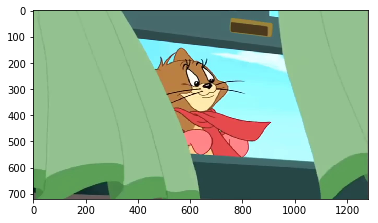

In [4]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)


In [5]:
data = pd.read_csv('mapping.csv')     # reading the csv file
# 0 – neither JERRY nor TOM
# 1 – for JERRY
# 2 – for TOM
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [6]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array
print(X.shape)   # Array size

(298, 720, 1280, 3)


In [7]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [8]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)
print(X.shape)

(298, 224, 224, 3)


In [9]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [11]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [13]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [14]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [15]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [16]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(units=512, activation='sigmoid'))    # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 26,217,475
Trainable params: 26,217,475
Non-trainable params: 0
_________________________________________________________________


In [17]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 8s 40ms/step - loss: 1.3229 - acc: 0.4135 - val_loss: 0.8934 - val_acc: 0.7222
Epoch 2/100
208/208 [==============================] - 6s 28ms/step - loss: 0.7831 - acc: 0.7163 - val_loss: 0.7495 - val_acc: 0.7111
Epoch 3/100
208/208 [==============================] - 6s 28ms/step - loss: 0.5536 - acc: 0.8317 - val_loss: 0.6186 - val_acc: 0.7111
Epoch 4/100
208/208 [==============================] - 6s 27ms/step - loss: 0.3801 - acc: 0.8462 - val_loss: 0.5429 - val_acc: 0.7778
Epoch 5/100
208/208 [==============================] - 6s 27ms/step - loss: 0.2412 - acc: 0.9519 - val_loss: 0.4609 - val_acc: 0.7889
Epoch 6/100
208/208 [==============================] - 6s 28ms/step - loss: 0.1597 - acc: 0.9423 - val_loss: 0.3932 - val_acc: 0.8333
Epoch 7/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0817 - acc: 0.9856 - val_loss: 0.4041 - val_acc: 0.8333
Epoch 8/100
208/2

208/208 [==============================] - 6s 28ms/step - loss: 0.0092 - acc: 0.9952 - val_loss: 0.4111 - val_acc: 0.8556
Epoch 62/100
208/208 [==============================] - 6s 27ms/step - loss: 0.0095 - acc: 0.9952 - val_loss: 0.3896 - val_acc: 0.8778
Epoch 63/100
208/208 [==============================] - 6s 31ms/step - loss: 0.0109 - acc: 0.9904 - val_loss: 0.4763 - val_acc: 0.8667
Epoch 64/100
208/208 [==============================] - 6s 29ms/step - loss: 0.0077 - acc: 0.9952 - val_loss: 0.4254 - val_acc: 0.8556
Epoch 65/100
208/208 [==============================] - 6s 30ms/step - loss: 0.0082 - acc: 0.9952 - val_loss: 0.4096 - val_acc: 0.8556
Epoch 66/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0085 - acc: 0.9952 - val_loss: 0.4194 - val_acc: 0.8444
Epoch 67/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0079 - acc: 0.9952 - val_loss: 0.5329 - val_acc: 0.8444
Epoch 68/100
208/208 [==============================] - 6s 27ms/step

In [31]:
predictions = model.predict_classes(train)

In [32]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")
yorig = y_train.argmax(1)

from sklearn.metrics import confusion_matrix
output = confusion_matrix(yorig,predictions)
print(output)
print(np.sum(np.diag(output))/np.sum(output))

The screen time of JERRY is 45 seconds
The screen time of TOM is 86 seconds
[[77  0  1]
 [ 0 45  0]
 [ 0  0 85]]
0.995192307692


In [20]:
import os
os.chdir("D:/Projects-Global-Logic/Video-PoC/Tom and Jerry/Testdata1")
os.getcwd()

'D:\\Projects-Global-Logic\\Video-PoC\\Tom and Jerry\\Testdata1'

In [21]:
count = 0
videoFile = "Tom and Jerry 2.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [22]:
test = pd.read_csv('test.csv')
test.head()

,Image_ID
0,test0.jpg
1,test1.jpg
2,test2.jpg
3,test3.jpg
4,test4.jpg


In [23]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [24]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)
test_image.shape

(180, 224, 224, 3)

In [25]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(test_image.shape[0], 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [26]:
predictions = model.predict_classes(test_image)

In [27]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 7 seconds
The screen time of TOM is 131 seconds
